# Final Year Project Phase 2 - Review 1
# Interactive Differential Evolution

### Required Packages

In [1]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

### Differential Evolution Overview

* DE is about finding the minimum of a function (black-box optimization/derivative-free optimization)

In [2]:
#Differential Evolution Function
def de(fobj, bounds, mut=0.8, crossp=0.7, popsize=20, its=1000):
    dimensions = len(bounds)
    pop = np.random.rand(popsize, dimensions)
    min_b, max_b = np.asarray(bounds).T
    diff = np.fabs(min_b - max_b)
    pop_denorm = min_b + pop * diff
    fitness = np.asarray([fobj(ind) for ind in pop_denorm])
    best_idx = np.argmin(fitness)
    best = pop_denorm[best_idx]
    for i in range(its):
        for j in range(popsize):
            idxs = [idx for idx in range(popsize) if idx != j]
            a, b, c = pop[np.random.choice(idxs, 3, replace = False)]
            mutant = np.clip(a + mut * (b - c), 0, 1)
            cross_points = np.random.rand(dimensions) < crossp
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimensions)] = True
            trial = np.where(cross_points, mutant, pop[j])
            trial_denorm = min_b + trial * diff
            f = fobj(trial_denorm)
            if f < fitness[j]:
                fitness[j] = f
                pop[j] = trial
                if f < fitness[best_idx]:
                    best_idx = j
                    best = trial_denorm
        yield best, fitness[best_idx]

### Parameters in Differential Evolution Algorithm
* **fobj** - function that needs to be optimized. It can defined using def or lambda.
* **bounds** - a list with the lower and upper bound for each parameter of the function
* **mut**
* **crossp**
* **popsize**
* **its** - Number of iterations

In [3]:
#Example TestCase: square function 
it1=list(de(lambda x: x**2, bounds=[(-100, 100)], its=5))
print(*it1)
it2=list(de(lambda x: x**2, bounds=[(-100, 100)], its=500))
print("\n")
print(it2[-1])

(array([6.29769503]), array([39.66096264])) (array([0.7501843]), array([0.56277649])) (array([0.71314725]), array([0.50857899])) (array([0.71314725]), array([0.50857899])) (array([-0.59527251]), array([0.35434936]))


(array([0.]), array([0.]))


DE for sum of 32 numbers between -30 to 30:

Parameter Values: -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0
Minimum Sum: -3200.0


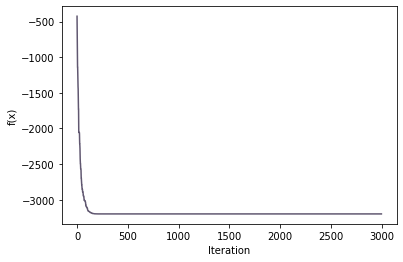

In [4]:
#Example TestCase: sum of 32 numbers

#Applying DE
it1=list(de(lambda x:sum(x), bounds=[(-100,100)]*32, its=3000))
print("DE for sum of 32 numbers between -30 to 30:\n")
print("Parameter Values:",*(it1[-1][0]))
print("Minimum Sum:",it1[-1][1])

#Plotting the results
x, f=zip(*it1)
plt.plot(f,color='#605770')
plt.xlabel('Iteration')
plt.ylabel('f(x)')
plt.show()

### Interactive Differential Evolution Demo

In [5]:
print("Minimizing sum of 32 numbers")
def algo(iterations,mut,crossp,popsize,bounds):
    it1=list(de(lambda x:sum(x), bounds=[(-100,1)]*32, mut=mut, crossp=crossp, popsize=int(popsize),its=iterations))
    return it1[-1]
interact(algo,iterations=(0,1000),mut=(0.0,1.0),crossp=(0.0,1.0),popsize=(0,100),bounds="")

Minimizing sum of 32 numbers


interactive(children=(IntSlider(value=500, description='iterations', max=1000), FloatSlider(value=0.5, descrip…

<function __main__.algo(iterations, mut, crossp, popsize, bounds)>